In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, desc
from datetime import datetime as DateTime, timedelta as TimeDelta
from datetime import date
from dateutil.parser import parse


In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
inspector = inspect(engine) 
inspector.get_table_names()

['measurement', 'station']

In [11]:
columns = inspector.get_columns('Measurement')
for things in columns:
    print(things['name'], things["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
columns = inspector.get_columns('Station')
for things in columns:
    print(things['name'], things["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [13]:
engine.execute('SELECT name FROM Station limit 5').fetchall()

[('WAIKIKI 717.2, HI US',),
 ('KANEOHE 838.1, HI US',),
 ('KUALOA RANCH HEADQUARTERS 886.9, HI US',),
 ('PEARL CITY, HI US',),
 ('UPPER WAHIAWA 874.3, HI US',)]

In [14]:
engine.execute('SELECT * FROM measurement limit 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [15]:
engine.execute('SELECT * FROM station LIMIT 5').fetchall()


[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [17]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
Day0 = dt.date(2016,8,1)
Day1 = dt.date(2017,8,1)
all_prcp_results = session.query(Measurement.date, Measurement.prcp).all()
#Between2Dates = all_prcp_results.filter(Measurement.date.between(Day0,Day1)).all()
#Between2Dates
#type(Day0)
all_prcp_results

[('2010-01-01', 0.08),
 ('2010-01-02', 0.0),
 ('2010-01-03', 0.0),
 ('2010-01-04', 0.0),
 ('2010-01-06', None),
 ('2010-01-07', 0.06),
 ('2010-01-08', 0.0),
 ('2010-01-09', 0.0),
 ('2010-01-10', 0.0),
 ('2010-01-11', 0.01),
 ('2010-01-12', 0.0),
 ('2010-01-14', 0.0),
 ('2010-01-15', 0.0),
 ('2010-01-16', 0.0),
 ('2010-01-17', 0.0),
 ('2010-01-18', 0.0),
 ('2010-01-19', 0.0),
 ('2010-01-20', 0.0),
 ('2010-01-21', 0.0),
 ('2010-01-22', 0.0),
 ('2010-01-23', 0.0),
 ('2010-01-24', 0.01),
 ('2010-01-25', 0.0),
 ('2010-01-26', 0.04),
 ('2010-01-27', 0.12),
 ('2010-01-28', 0.0),
 ('2010-01-30', None),
 ('2010-01-31', 0.03),
 ('2010-02-01', 0.01),
 ('2010-02-03', None),
 ('2010-02-04', 0.01),
 ('2010-02-05', 0.0),
 ('2010-02-06', 0.0),
 ('2010-02-07', 0.0),
 ('2010-02-08', 0.0),
 ('2010-02-09', 0.0),
 ('2010-02-11', 0.0),
 ('2010-02-12', 0.02),
 ('2010-02-13', 0.01),
 ('2010-02-14', 0.0),
 ('2010-02-15', 0.0),
 ('2010-02-16', 0.0),
 ('2010-02-17', 0.0),
 ('2010-02-19', None),
 ('2010-02-20', 0

In [17]:
# Calculate the date 1 year ago from the last data point in the database
#LAST DAY
lastprcp_date = session.query(func.max(Measurement.date)).all()
lastprcp_date

[('2017-08-23')]

In [18]:
# Calculate the date 1 year ago from the last data point in the database
#1 YEAR AGO
#my_list = [('2017-08-23')]
#my_date = date.lastprcp_date()
#type(my_date)
#thedate = lastprcp_date.strftime("%d/%m/%y")
#dt.strptime(lastprcp_date, "%d/%m/%y")
#date_time_str = '2018-06-29 08:15:27.243860'
#date_time_obj = DateTime.strptime('2017-08-23', "%Y-%m-%d")
#self.date = datetime.datetime.strptime(self.d, "%Y-%m-%d")
#type(DayLastprcp)
#DATE = [DateTime.strptime(lastprcp_date,'%Y-%m-%d')]
#datelastprcp = dt.date(lastprcp_date)
DayLastprcp = dt.date(2017,8,23)
duration = dt.timedelta(days=365) 
print(DayLastprcp - duration)
type(duration)

2016-08-23


datetime.timedelta

In [19]:
my_list = [('2017-08-23')]
my_date = my_list[0]
type(my_date)

str

In [20]:
today = date.today()
print("Today's date:", today)
type(today)

Today's date: 2019-09-29


datetime.date

In [21]:
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
prcps_df= pd.DataFrame(all_prcp_results)
prcps_df.set_index('date',inplace=True)
prcps_df.head()

,prcp
date,
2010-01-01,0.08
2010-01-02,0.00
2010-01-03,0.00
2010-01-04,0.00
2010-01-06,NaN


In [22]:
# Sort the dataframe by date
prcps_df.sort_values(['date']).head()

,prcp
date,
2010-01-01,0.08
2010-01-01,0.21
2010-01-01,0.15
2010-01-01,0.15
2010-01-01,0.05


# Exploratory Climate Analysis

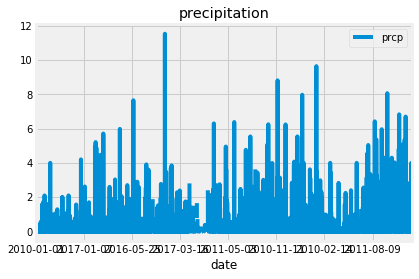

In [23]:
# Use Pandas Plotting with Matplotlib to plot the data
prcps_df.plot(title='precipitation')

In [24]:
# Use Pandas Plotting with Matplotlib to plot the data



![precipitation](Images/precipitation.png)

In [25]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcps_df.describe()

,prcp
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


In [26]:
# Use Pandas to calcualte the summary statistics for the precipitation data

![describe](Images/describe.png)

In [27]:
# Design a query to show how many stations are available in this dataset?
stationtotal = session.query(Measurement.station)
distinctstations = stationtotal.distinct(Measurement.station).count()
print('Total distinct station number is  ' + str(distinctstations))

Total distinct station number is  9


In [28]:
# What are the most active stations? (i.e. what stations have the most rows)?
stationsbyactivity = session.query(Measurement.station, func.count(Measurement.date))
activestations = stationsbyactivity.group_by(Measurement.station).order_by(func.count(Measurement.date).desc()).limit(1).scalar()
activestations

'USC00519281'

In [29]:
# List the stations and the counts in descending order.
themostactivestations = session.query(Measurement.station)
activestationsranked = themostactivestations.group_by(Measurement.station)
activestationssorted = activestationsranked.order_by(func.count(Measurement.date).desc()).all()
activestationssorted

[('USC00519281'),
 ('USC00519397'),
 ('USC00513117'),
 ('USC00519523'),
 ('USC00516128'),
 ('USC00514830'),
 ('USC00511918'),
 ('USC00517948'),
 ('USC00518838')]

In [30]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
lowest = session.query(Measurement.station, Measurement.tobs).filter(Measurement.station == 'USC00519281').order_by(Measurement.tobs).first()
lowest

('USC00519281', 54.0)

In [31]:
# highest temperature recorded, and average temperature most active station?
highest = session.query(Measurement.station, Measurement.tobs).filter(Measurement.station == 'USC00519281').order_by(desc(Measurement.tobs)).first()
highest

('USC00519281', 85.0)

In [32]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
avgr = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
avgr

[(71.66378066378067)]

In [33]:
# highest temperature recorded, and average temperature most active station?
highest = session.query(Measurement.station, Measurement.tobs).filter(Measurement.station == 'USC00519281').order_by(desc(Measurement.tobs))
highest_df= pd.DataFrame(highest)
highest_df.set_index('station',inplace=True)
highest_df.head()

,tobs
station,
USC00519281,85.0
USC00519281,84.0
USC00519281,83.0
USC00519281,83.0
USC00519281,83.0


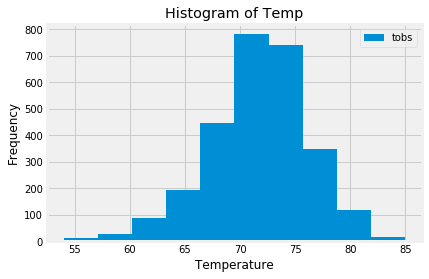

In [34]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
highest_df.plot.hist(title='Histogram of Temp')
plt.xlabel('Temperature')
plt.show()

In [35]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


![precipitation](Images/station-histogram.png)

In [36]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
calculatedtemps =  calc_temps('2017-01-17', '2017-01-30')
calculatedtemps

[(63.0, 70.76404494382022, 78.0)]

In [37]:
caltemps = [ ['TMIN', 63.0] ,
             ['TAVG', 70.76404494382022] ,
             ['TMAX', 78.0]]        #({'Stat':s.index, 'Thetemp':s.values})
caltemps_df = pd.DataFrame(caltemps,columns = ['Stat','Thetemp'])
caltemps_df.set_index('Stat', inplace=True)
caltemps_df

,Thetemp
Stat,
TMIN,63.000000
TAVG,70.764045
TMAX,78.000000


In [38]:
caltemps_df.loc['TAVG']

Thetemp    70.764045
Name: TAVG, dtype: float64

In [39]:
caltemps_df.loc['TMAX'] - caltemps_df.loc['TMIN']


Thetemp    15.0
dtype: float64

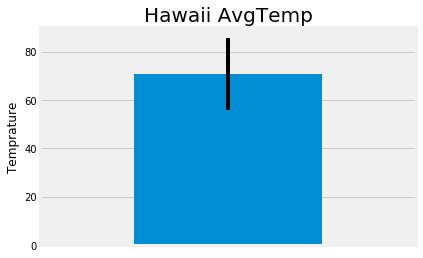

In [40]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)       .group_by(Station.name)
avg_temp = caltemps_df.loc['TAVG']
tmax_tmin = caltemps_df.loc['TMAX'] - caltemps_df.loc['TMIN']
avg_temp.plot(kind='bar', yerr=tmax_tmin)
plt.title("Hawaii AvgTemp", fontsize=20)
plt.ylabel("Temprature")
plt.xticks([])
plt.show()

In [41]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
# List the stations and the counts in descending order.
precipitation = session.query(Station.name, Measurement.station, Station.latitude, Station.longitude, Station.elevation, Measurement.prcp,)\
        .filter(Measurement.date >= '2017-01-17', Measurement.date <= '2017-01-30')\
        .order_by((Measurement.prcp).desc())\
        .all()

total_amount_rainfall_df= pd.DataFrame(precipitation)
total_amount_rainfall_df.set_index('name',inplace=True)
total_amount_rainfall_df.head()

,station,latitude,longitude,elevation,prcp
name,,,,,
"WAIKIKI 717.2, HI US",USC00516128,21.2716,-157.8168,3.0,2.64
"KANEOHE 838.1, HI US",USC00516128,21.4234,-157.8015,14.6,2.64
"KUALOA RANCH HEADQUARTERS 886.9, HI US",USC00516128,21.5213,-157.8374,7.0,2.64
"PEARL CITY, HI US",USC00516128,21.3934,-157.9751,11.9,2.64
"UPPER WAHIAWA 874.3, HI US",USC00516128,21.4992,-158.0111,306.6,2.64


## Optional Challenge Assignment

In [42]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [43]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [44]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [45]:
# Plot the daily normals as an area plot with `stacked=False`
